## Building Neural Network from Scratch

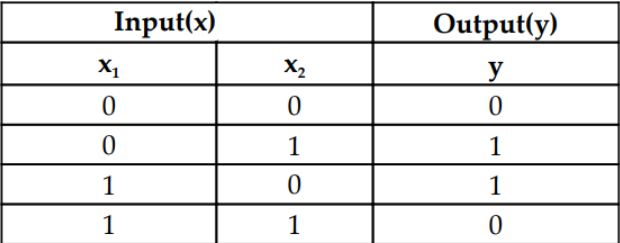

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
x = np.array([ [0, 1], [1, 0], [1, 1],[0, 0] ])
y = np.array([ [1], [1], [0], [0]])

In [4]:
num_input = 2
num_hidden = 5
num_output = 1

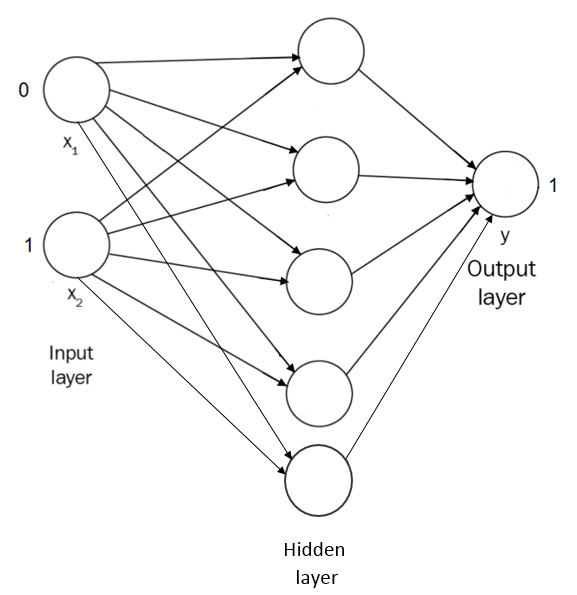

In [5]:
# Initialize weights and bias randomly. First, we initialize, input to hidden layer weights
Wxh = np.random.randn(num_input,num_hidden)
bh = np.zeros((1,num_hidden))

In [6]:
Why = np.random.randn (num_hidden,num_output)
by = np.zeros((1,num_output))

In [7]:
def sigmoid(z):
    return 1 / (1+np.exp(-z))

In [8]:
def sigmoid_derivative(z):
    return np.exp(-z)/((1+np.exp(-z))**2)

In [9]:
# define the forward propagation function
def forward_prop(x,Wxh,Why):
    z1 = np.dot(x,Wxh) + bh
    a1 = sigmoid(z1)
    z2 = np.dot(a1,Why) + by
    y_hat = sigmoid(z2)
    
    return z1,a1,z2,y_hat

In [10]:
# define the backward propagation function
def backword_prop(y_hat, z1, a1, z2):
    delta2 = np.multiply(-(y-y_hat),sigmoid_derivative(z2))
    dJ_dWhy = np.dot(a1.T, delta2)
    delta1 = np.dot(delta2,Why.T)*sigmoid_derivative(z1)
    dJ_dWxh = np.dot(x.T, delta1) 

    return dJ_dWxh, dJ_dWhy

In [11]:
# Define the cost function
def cost_function(y, y_hat):
    J = 0.5*sum((y-y_hat)**2)
    
    return J

In [12]:
# Set the learning rate and number of training iterations:
alpha = 0.01
num_iterations = 5000

In [13]:
# Start the training the model
cost = []
for i in range(num_iterations):
    
    #perform forward propagation and predict output
    z1,a1,z2,y_hat = forward_prop(x,Wxh,Why)
    
    #perform backward propagation and calculate gradients
    dJ_dWxh, dJ_dWhy = backword_prop(y_hat, z1, a1, z2)
        
    #update the weights
    Wxh = Wxh -alpha * dJ_dWxh
    Why = Why -alpha * dJ_dWhy
    
    #compute cost
    c = cost_function(y, y_hat)
    
    #store the cost
    cost.append(c)

Text(0, 0.5, 'Cost')

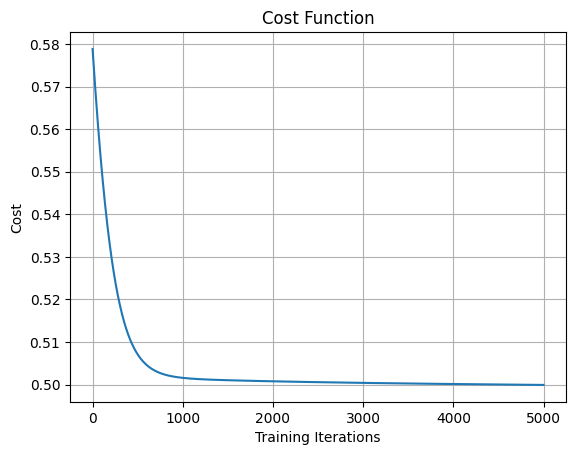

In [14]:
plt.grid()
plt.plot(range(num_iterations),cost)

plt.title('Cost Function')
plt.xlabel('Training Iterations')
plt.ylabel('Cost')